In [13]:
import os
import numpy as np
import pandas as pd #for manipulating DataFrame
import matplotlib.pyplot as plt #for plotting
import seaborn as sns

In [12]:
os.chdir(os.getcwd()) #Setting the working directory

In [14]:
dataFrame = pd.read_csv('train.csv') #as both ipynb and train file are in same diectory this will work

In [16]:
dataFrame.head() #this will print the first 5 rows of the dataSet
dataFrame.tail() #this will print the last 5 rows of the dataSet

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [19]:
dataFrame.shape #shape will show the total number of columns and rows in the dataFrame.

(1460, 81)

In [21]:
dataFrame.info() # this'll show all the columns nad their respective types instead of using shape info() is good choice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

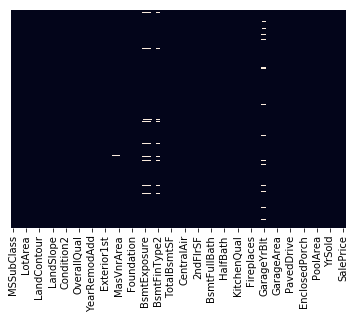

In [46]:
sns.heatmap(dataFrame.isnull(),yticklabels = False,cbar=False)

In [28]:
dataFrame.isnull().sum().sort_values(ascending = False).head()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [29]:
#dropping top 4 columns as they consists more than 80% of Null values, so no point in imputing the values
# also dropping the ID as this does not have any sugnificance and making the DaatFrame Leaner
dataFrame.drop(['Id','PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace= True)

In [30]:
dataFrame.shape #here shape is used because we are just looking at the column count

(1460, 76)

In [31]:
dataFrame.isnull().sum().sort_values(ascending = False)

FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
YearBuilt          0
Exterior2nd        0
Exterior1st        0
ExterQual          0
ExterCond          0
Foundation         0
RoofMatl           0
RoofStyle          0
YearRemodAdd       0
SalePrice          0
OverallCond        0
OverallQual        0
HouseStyle         0
BldgType           0
Condition2         0
                ... 
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
BsmtUnfSF          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr 

In [41]:
#dataFrame['FireplaceQu'].dtype.kind
#dataFrame['LotFrontage'].dtype.kind
#dataFrame['GarageCond'].dtype.kind
#dataFrame['GarageYrBlt'].dtype.kind
#dataFrame['GarageFinish'].dtype.kind
#dataFrame['GarageQual'].dtype.kind
#dataFrame['BsmtExposure'].dtype.kind
#dataFrame['BsmtFinType2'].dtype.kind
#dataFrame['BsmtFinType1'].dtype.kind
#dataFrame['BsmtCond'].dtype.kind
#dataFrame['BsmtQual'].dtype.kind
#dataFrame['MasVnrType'].dtype.kind
#dataFrame['MasVnrArea'].dtype.kind
dataFrame['Electrical'].dtype.kind

'O'

In [42]:
dataFrame.info('LotFrontage')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [47]:
#Imputing the Missing Values
#we will impute mean values of the columns where there is numerical value
#for categorical values we will impute with mode
dataFrame['LotFrontage']=dataFrame['LotFrontage'].fillna(dataFrame['LotFrontage'].mean())
dataFrame['BsmtCond']=dataFrame['BsmtCond'].fillna(dataFrame['BsmtCond'].mode()[0])
dataFrame['BsmtQual']=dataFrame['BsmtQual'].fillna(dataFrame['BsmtQual'].mode()[0])
dataFrame['FireplaceQu']=dataFrame['FireplaceQu'].fillna(dataFrame['FireplaceQu'].mode()[0])
dataFrame['GarageType']=dataFrame['GarageType'].fillna(dataFrame['GarageType'].mode()[0])
dataFrame['GarageFinish']=dataFrame['GarageFinish'].fillna(dataFrame['GarageFinish'].mode()[0])
dataFrame['GarageQual']=dataFrame['GarageQual'].fillna(dataFrame['GarageQual'].mode()[0])
dataFrame['GarageCond']=dataFrame['GarageCond'].fillna(dataFrame['GarageCond'].mode()[0])
dataFrame['GarageCond']=dataFrame['GarageCond'].fillna(dataFrame['GarageCond'].mode()[0])

In [44]:
dataFrame.shape

(1460, 76)

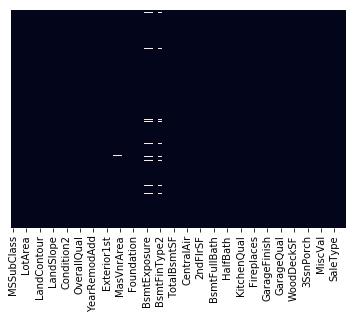

In [50]:
sns.heatmap(dataFrame.isnull(),yticklabels = False,cbar=False)
#in the below Seaborn 

In [49]:
dataFrame.drop(['GarageYrBlt'],axis=1,inplace=True)